In [22]:
'''
Hyperparameter tuning for Naive Bayes.
'''
def my_NB(X, labels):
    
    tuned_parameters = {'alpha': [1.0, 1e-3, 1e-6, 1e-12, 1e-18]}
    
    metrics = ['accuracy']
    m = ['accuracy']
#     m = ['precision_micro', 'f1_micro', 'accuracy', 'recall_micro']
    models = []
    
    for score in metrics:
        model = {}
        nb = MultinomialNB()
        print "Running for", score
        clf = GridSearchCV(nb, tuned_parameters, cv=10, scoring=score, verbose=3)
        clf.fit(X, labels)
        print "\nBest parameters for " + score + ": " + str(clf.best_estimator_)
        print "Best score achieved for " + score + ": " + str(clf.best_score_)
        best_nb = clf.best_estimator_
        
        for s in m:
#             print "Running the best " + score + " model for " + s + ".."
            model[s] = np.array(cross_val_score(best_nb, X, labels, cv=10, scoring=s))
        
#         print "For ", score 
        print model
#         print "\n\n"
        models.append((model, best_nb))
    return models

In [23]:
'''
Load CSVs and getting it ready for CountVectorizer.
'''
import pandas as pd

numberOfFeatures = 100

# categories = ['Agriculture.csv', 'Biography.csv', 'Botany.csv', 'Church.csv', 'Commerce.csv', 'Dictionaries.csv', 
#               'Drama.csv', 'Fiction.csv', 'History.csv', 'History_Natural.csv', 'Law.csv', 'Mathematics.csv', 
#               'Medicine.csv', 'Physics.csv', 'Poetry.csv', 'Politics.csv', 'Rhetoric.csv', 'Sermons.csv', 
#               'Travels.csv']

df_agri = pd.read_csv('./5_features/Model3/agri_' + str(numberOfFeatures) + '.csv', header=None, names=range(0,numberOfFeatures))

df_botany = pd.read_csv('./5_features/Model3/botany_' + str(numberOfFeatures) + '.csv', header=None, names=range(0,numberOfFeatures))
df_church = pd.read_csv('./5_features/Model3/church_' + str(numberOfFeatures) + '.csv', header=None, names=range(0,numberOfFeatures))
df_commerce = pd.read_csv('./5_features/Model3/commerce_' + str(numberOfFeatures) + '.csv', header=None, names=range(0,numberOfFeatures))
df_drama = pd.read_csv('./5_features/Model3/drama_' + str(numberOfFeatures) + '.csv', header=None, names=range(0,numberOfFeatures))
df_fiction = pd.read_csv('./5_features/Model3/fiction_' + str(numberOfFeatures) + '.csv', header=None, names=range(0,numberOfFeatures))
df_history = pd.read_csv('./5_features/Model3/history_' + str(numberOfFeatures) + '.csv', header=None, names=range(0,numberOfFeatures))
df_historyNatural = pd.read_csv('./5_features/Model3/historyNatural_' + str(numberOfFeatures) + '.csv', header=None, names=range(0,numberOfFeatures))
df_law = pd.read_csv('./5_features/Model3/law_' + str(numberOfFeatures) + '.csv', header=None, names=range(0,numberOfFeatures))
df_math = pd.read_csv('./5_features/Model3/math_' + str(numberOfFeatures) + '.csv', header=None, names=range(0,numberOfFeatures))
df_med = pd.read_csv('./5_features/Model3/med_' + str(numberOfFeatures) + '.csv', header=None, names=range(0,numberOfFeatures))
df_phy = pd.read_csv('./5_features/Model3/phy_' + str(numberOfFeatures) + '.csv', header=None, names=range(0,numberOfFeatures))
df_poetry = pd.read_csv('./5_features/Model3/poetry_' + str(numberOfFeatures) + '.csv', header=None, names=range(0,numberOfFeatures))
df_politics = pd.read_csv('./5_features/Model3/politics_' + str(numberOfFeatures) + '.csv', header=None, names=range(0,numberOfFeatures))
df_rhetoric = pd.read_csv('./5_features/Model3/rhetoric_' + str(numberOfFeatures) + '.csv', header=None, names=range(0,numberOfFeatures))
df_sermons = pd.read_csv('./5_features/Model3/sermons_' + str(numberOfFeatures) + '.csv', header=None, names=range(0,numberOfFeatures))
df_travels = pd.read_csv('./5_features/Model3/travels_' + str(numberOfFeatures) + '.csv', header=None, names=range(0,numberOfFeatures))

# Removing NaN
df_agri.fillna('', inplace=True)

df_botany.fillna('', inplace=True)
df_church.fillna('', inplace=True)
df_commerce.fillna('', inplace=True)
df_drama.fillna('', inplace=True)
df_fiction.fillna('', inplace=True)
df_history.fillna('', inplace=True)
df_historyNatural.fillna('', inplace=True)
df_law.fillna('', inplace=True)
df_math.fillna('', inplace=True)
df_med.fillna('', inplace=True)
df_phy.fillna('', inplace=True)
df_poetry.fillna('', inplace=True)
df_politics.fillna('', inplace=True)
df_rhetoric.fillna('', inplace=True)
df_sermons.fillna('', inplace=True)
df_travels.fillna('', inplace=True)

# Changing it to CountVec fashion:
agri = [' '.join(str(r) for r in row) for row in df_agri.values]

botany = [' '.join(str(r) for r in row) for row in df_botany.values]
church = [' '.join(str(r) for r in row) for row in df_church.values]
commerce = [' '.join(str(r) for r in row) for row in df_commerce.values]

drama = [' '.join(str(r) for r in row) for row in df_drama.values]
fiction = [' '.join(str(r) for r in row) for row in df_fiction.values]
history = [' '.join(str(r) for r in row) for row in df_history.values]
historyNatural = [' '.join(str(r) for r in row) for row in df_historyNatural.values]
law = [' '.join(str(r) for r in row) for row in df_law.values]
math = [' '.join(str(r) for r in row) for row in df_math.values]
med = [' '.join(str(r) for r in row) for row in df_med.values]

phy = [' '.join(str(r) for r in row) for row in df_phy.values]
poetry = [' '.join(str(r) for r in row) for row in df_poetry.values]
politics = [' '.join(str(r) for r in row) for row in df_politics.values]
rhetoric = [' '.join(str(r) for r in row) for row in df_rhetoric.values]
sermons = [' '.join(str(r) for r in row) for row in df_sermons.values]
travels = [' '.join(str(r) for r in row) for row in df_travels.values]

# Passing it to CountVectorizer:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.grid_search import GridSearchCV
import numpy as np

everything = agri + botany + church + commerce + drama + fiction + history + historyNatural + law + math + med + \
             phy + poetry + politics + rhetoric + sermons + travels
print "Everything: ", len(everything)

# Defining labels (must be in the same order)
labels = len(agri)*['Agriculture'] + len(botany)*['Botany'] + len(church)*['Church'] + len(commerce)*['Commerce'] + len(drama)*['Drama'] + len(fiction)*['Fiction'] + len(history)*['History'] + len(historyNatural)*['History Natural'] + len(law)*['Law'] + len(math)*['Mathematics'] + len(med)*['Medicine'] + len(phy)*['Physics'] + len(poetry)*['Poetry'] + len(politics)*['Politics'] + len(rhetoric)*['Rhetoric'] + len(sermons)*['Sermons'] + len(travels)*['Travels']

# Storing sizes (in same order)
sizes_in_same_order = [len(agri), len(botany), len(church), len(commerce), len(drama), len(fiction), len(history), len(historyNatural), len(law), len(math), len(med), len(phy), len(poetry), len(politics), len(rhetoric), len(sermons), len(travels)]

count = 0
for i in sizes_in_same_order:
    count += i
print "Count: ", count

vectorizer500 = CountVectorizer()
X500 = vectorizer500.fit_transform(everything)
print "Vectorizer: ", X500.shape # Prints (59881, something)

Everything:  57231
Count:  57231
Vectorizer:  (57231, 140833)


In [24]:
results_500 = my_NB(X500, labels)
print "\nAccuracy: ", results_500[0][0]['accuracy'].mean()
print "Std-dev: ", results_500[0][0]['accuracy'].std()
# print "Best hyperparams: ", results_500[0][1]
# print "Entire array: ", results_500

Running for accuracy
Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV] alpha=1.0 .......................................................
[CV] .............................. alpha=1.0, score=0.710747 -   0.4s
[CV] alpha=1.0 .......................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] .............................. alpha=1.0, score=0.775083 -   0.4s
[CV] alpha=1.0 .......................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV] .............................. alpha=1.0, score=0.774013 -   0.4s
[CV] alpha=1.0 .......................................................
[CV] .............................. alpha=1.0, score=0.786164 -   0.4s
[CV] alpha=1.0 .......................................................
[CV] .............................. alpha=1.0, score=0.744670 -   0.5s
[CV] alpha=1.0 .......................................................
[CV] .............................. alpha=1.0, score=0.699878 -   0.5s
[CV] alpha=1.0 .......................................................
[CV] .............................. alpha=1.0, score=0.706170 -   0.5s
[CV] alpha=1.0 .......................................................
[CV] .............................. alpha=1.0, score=0.761322 -   0.5s
[CV] alpha=1.0 .......................................................
[CV] .............................. alpha=1.0, score=0.632389 -   0.4s
[CV] alpha=1.0 .......................................................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   17.9s finished



Best parameters for accuracy: MultinomialNB(alpha=1e-06, class_prior=None, fit_prior=True)
Best score achieved for accuracy: 0.73970400657
{'accuracy': array([ 0.75104676,  0.80212877,  0.80702061,  0.80922432,  0.77472912,
        0.73448698,  0.74759657,  0.78422801,  0.66211962,  0.52405108])}

Accuracy:  0.73966318322
Std-dev:  0.0831951140199


In [1]:
# 67.79 without filtering NaNs (Unigram) [2 mins]
# 59.58 without filtering NaNs (Bigrams) [20 mins]
# 65.31 without filtering NaNs (Both Unigrams and Bigrams) [28 mins]

## Since Model 3 100 is the best Naive Bayes model, plotting its confusion matrix:

In [25]:
from sklearn.model_selection import cross_val_predict
'''
The function cross_val_predict has a similar interface to cross_val_score, but returns, for each element in the 
input, the prediction that was obtained for that element when it was in the test set. Only cross-validation 
strategies that assign all elements to a test set exactly once can be used (otherwise, an exception is raised).
'''

from sklearn import metrics

nb1 = MultinomialNB(alpha=1e-06, class_prior=None, fit_prior=True)

predicted = cross_val_predict(nb1, X500, labels, cv=10)

print "Accuracy: ", metrics.accuracy_score(labels, predicted)
print predicted

Accuracy:  0.73970400657
['Agriculture' 'Agriculture' 'Agriculture' ..., 'Travels' 'Travels'
 'Travels']


In [26]:
from sklearn.metrics import confusion_matrix

categories = ['Agriculture.csv', 'Botany.csv', 'Church.csv', 'Commerce.csv', 
              'Drama.csv', 'Fiction.csv', 'History.csv', 'History Natural.csv', 'Law.csv', 'Mathematics.csv', 
              'Medicine.csv', 'Physics.csv', 'Poetry.csv', 'Politics.csv', 'Rhetoric.csv', 'Sermons.csv', 
              'Travels.csv']

names = [c[:-4] for c in categories]

conf_mat = confusion_matrix(labels, predicted, names)

print conf_mat.shape

%matplotlib inline
import matplotlib.pyplot as plt

(17, 17)


Normalized confusion matrix
[[  6.32216679e-01   2.77975766e-02   2.85103350e-03   7.69779045e-02
    2.85103350e-03   7.12758375e-03   2.70848182e-02   6.41482537e-03
    4.84675695e-02   7.84034212e-03   6.84248040e-02   4.98930862e-03
    2.63720599e-02   1.49679259e-02   1.42551675e-03   2.28082680e-02
    2.13827512e-02]
 [  8.09716599e-02   5.89068826e-01   1.82186235e-02   5.26315789e-02
    0.00000000e+00   0.00000000e+00   2.22672065e-02   2.02429150e-02
    5.66801619e-02   8.09716599e-03   5.46558704e-02   2.22672065e-02
    3.23886640e-02   6.07287449e-03   0.00000000e+00   1.41700405e-02
    2.22672065e-02]
 [  1.97044335e-04   1.97044335e-04   4.85123153e-01   1.51724138e-02
    1.37931034e-03   9.06403941e-03   3.33004926e-02   0.00000000e+00
    5.00492611e-02   1.57635468e-03   3.54679803e-03   2.16748768e-03
    4.15763547e-02   5.00492611e-02   1.35960591e-02   2.89655172e-01
    3.34975369e-03]
 [  2.21343874e-02   3.95256917e-04   4.74308300e-03   5.67984190e-01
  

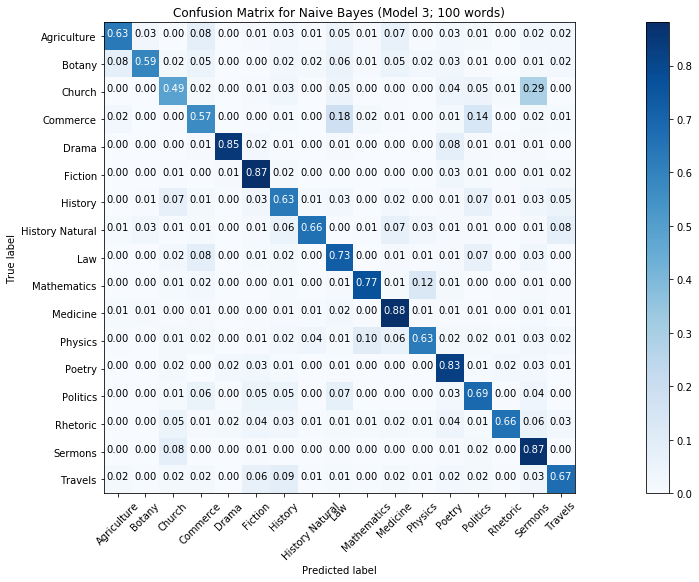

In [27]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot non-normalized confusion matrix
plt.figure(figsize=(20,8))
plot_confusion_matrix(conf_mat, classes=names, title='Confusion Matrix for Naive Bayes (Model 3; 100 words)')
plt.savefig('/Users/sunyambagga/Desktop/5.0_NB_Model3_100words_ConfMat_With_Normalisation.pdf')